# Data for TAO recycled

In [4]:
import bittensor as bt
import pandas as pd
from substrateinterface import SubstrateInterface
import matplotlib.pyplot as plt
import numpy as np

In [2]:
subtensor = bt.subtensor('archive')

In [3]:
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")

In [4]:
block = substrate.get_block()['header']['number']
print(block)

3048607


In [2]:
# taking the data from the TAORecycledInterval function of the tao-reycled.ts script
## data from block 2629227 to block 3061227
TAO_recycled = {
  '1': 1737.17,
  '2': 2322.93,
  '3': 300.56,
  '4': 1889.26,
  '5': 2093.04,
  '6': 143.62,
  '7': 1154.77,
  '8': 1075.05,
  '9': 22.03,
  '10': 948.91,
  '11': 261.89,
  '12': 226.67,
  '13': 141.46,
  '14': 413.32,
  '15': 346.23,
  '16': 215.41,
  '17': 313.95,
  '18': 6956.28,
  '19': 7423.59,
  '20': 611.78,
  '21': 2075.78,
  '22': 885.49,
  '23': 1123.88,
  '24': 424.36,
  '25': 204.39,
  '26': 659.14,
  '27': 1606.04,
  '28': 1421.69,
  '29': 455.66,
  '30': 156.75,
  '31': 560.89,
  '32': 779.23,
  '33': 68.93,
  '34': 43.31
}

### TAO Recycled by subnet, 4 months

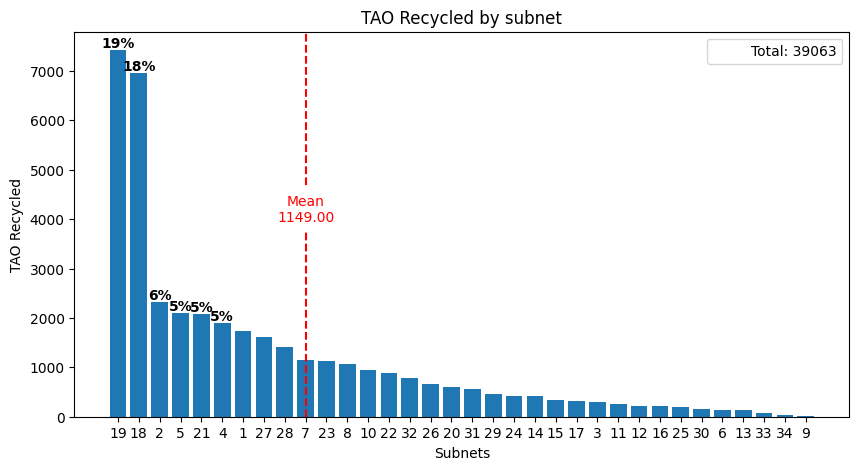

In [5]:
sorted_data = dict(sorted(TAO_recycled.items(), key=lambda item: item[1], reverse=True))

# Separate the keys and values
keys = list(sorted_data.keys())
values = list(sorted_data.values())

# Calculate total sum
total = round(sum(values))

# Calculate percentages
percentages = [round((value / total) * 100) for value in values]

mean_value = round(np.mean(values))
median_value = np.median(values)
percentile_10 = np.percentile(values, 90)

# Create the bar plot
plt.figure(figsize=(10, 5))  # Optional: Specify the size of the plot
bars = plt.bar(keys, values)

# Function to find the closest key to the given value
def find_closest_key(data, target):
    return min(data.keys(), key=lambda k: abs(data[k] - target))

# Find the closest keys
mean_key = find_closest_key(sorted_data, mean_value)
# median_key = find_closest_key(sorted_data, median_value)
percentile_10_key = find_closest_key(sorted_data, percentile_10)

# Plot vertical lines at the positions of mean, median, and 10th percentile
for key, value, label, color in zip([mean_key],
                                    [mean_value],
                                    ['Mean'],
                                    ['r']):
    plt.axvline(x=keys.index(key), color=color, linestyle='--')
    plt.text(keys.index(key), (plt.ylim()[1])/2, f'{label}\n{value:.2f}', 
             color=color, ha='center', va='bottom', backgroundcolor='white')


# Annotate bars with percentages
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    if percent > 4:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.0f}%', 
                ha='center', va='bottom', color='black', fontweight='bold')
    else:
        None


# Add total to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='w', label=f'Total: {total}'))
plt.legend(handles=handles)

# Add titles and labels
plt.title('TAO Recycled by subnet')
plt.xlabel('Subnets')
plt.ylabel('TAO Recycled')

# Show the plot
plt.show()

In [10]:
# live_emissions
recycling_data = pd.DataFrame(columns=[
    'Subnets',
    'burn_cost', 
    'target_regs_per_interval',
    'min_burn',
    'adjustment_alpha',
    'emission'
    ])

for i in range(1, 35):
    hyperparameters = subtensor.get_subnet_hyperparameters(i, block)
    info = subtensor.get_subnet_info(i, block)
    emission = subtensor.get_emission_value_by_subnet(i, block)
    
    # Append a new row to the DataFrame
    recycling_data.loc[i] = {
        'Subnets': i,
        'burn_cost': float(info.burn),
        'target_regs_per_interval': hyperparameters.target_regs_per_interval,
        'min_burn': hyperparameters.min_burn / (10**9),
        'adjustment_alpha': hyperparameters.adjustment_alpha,
        'emission': float(emission)
    }


TAO_recycled = {int(k): v for k, v in TAO_recycled.items()}

# Add the dictionary values as a new column based on the DataFrame's index
recycling_data['TAO_recycled'] = recycling_data.index.map(TAO_recycled)


# recycling_data['TAO_recycled'] = pd.Series(TAO_recycled)

# recycling_data.set_index('Subnets', inplace=True)

### Charting the quantity of TAO recycled by subnet, w/ SN sorted by burn cost

In [ ]:
recycling_data_sorted = recycling_data.sort_values(by='burn_cost', ascending=False)
recycling_data_sorted.reset_index(drop=True, inplace=True)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(recycling_data_sorted.index, recycling_data_sorted['TAO_recycled'])
plt.xlabel('Subnets')
plt.ylabel('TAO Recycled')
plt.title('TAO Recycled by Subnet')
plt.xticks(rotation=45)
plt.show()


### Charting the quantity of TAO recycled by subnet, w/ SN sorted by emission

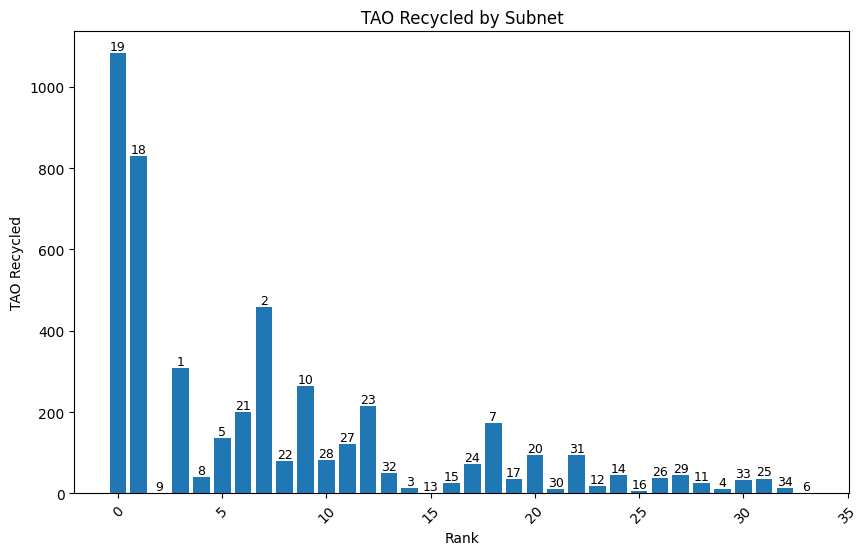

In [48]:
# computing the mean and sorting the data
mean_tao_recycled = recycling_data['TAO_recycled'].mean()
recycling_data_sorted = recycling_data.sort_values(by='emission', ascending=False)
recycling_data_sorted.reset_index(drop=True, inplace=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(recycling_data_sorted.index, recycling_data_sorted['TAO_recycled'])
plt.xlabel('Rank')
plt.ylabel('TAO Recycled')
plt.title('TAO Recycled by Subnet, sorted by emission')
plt.xticks(rotation=45)

# Add labels for subnets with 'tao_recycled' above the mean
for bar, (_, row) in zip(bars, recycling_data_sorted.iterrows()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(row['Subnets']),
            ha='center', va='bottom', fontsize=9, color='black')

plt.show()


### Historical TAO reycled for a subnet

In [6]:
# taking the data from the TAORecycledbyPeriod function of the tao-reycled.ts script
# params: new Date('2024-04-05'), 2, 2701227 , 3062120, 7200
data = {
  '2024-04-07': 3.49,
  '2024-04-08': 2.22,
  '2024-04-09': 3.29,
  '2024-04-10': 3.12,
  '2024-04-11': 2.91,
  '2024-04-12': 5.24,
  '2024-04-13': 7.64,
  '2024-04-14': 1.37,
  '2024-04-15': 4.79,
  '2024-04-16': 6.09,
  '2024-04-17': 16.68,
  '2024-04-18': 19.62,
  '2024-04-19': 19.53,
  '2024-04-20': 23.8,
  '2024-04-21': 38.38,
  '2024-04-22': 48.23,
  '2024-04-23': 85,
  '2024-04-24': 74.92,
  '2024-04-25': 68.49,
  '2024-04-26': 30.85,
  '2024-04-27': 32.47,
  '2024-04-28': 82.38,
  '2024-04-29': 72.68,
  '2024-04-30': 48.25,
  '2024-05-01': 41.47,
  '2024-05-02': 33.64,
  '2024-05-03': 32.61,
  '2024-05-04': 67.34,
  '2024-05-05': 51.58,
  '2024-05-06': 56.28,
  '2024-05-07': 47.77,
  '2024-05-08': 34.2,
  '2024-05-09': 41.15,
  '2024-05-10': 50.21,
  '2024-05-11': 52.09,
  '2024-05-12': 35.16,
  '2024-05-13': 134.73,
  '2024-05-14': 85.11,
  '2024-05-15': 59.86,
  '2024-05-16': 67.6,
  '2024-05-17': 75.93,
  '2024-05-18': 68.63,
  '2024-05-19': 66.3,
  '2024-05-20': 63.05,
  '2024-05-21': 34.84,
  '2024-05-22': 99.83,
  '2024-05-23': 65.15,
  '2024-05-24': 60.21,
  '2024-05-25': 71.65,
  '2024-05-26': 59.07
}

In [7]:
# Convert the dictionary into a pandas DataFrame
historical_recycle = pd.DataFrame(list(data.items()), columns=['Date', 'TAO Recycled'])

# Convert the 'Date' column to datetime objects
historical_recycle['Date'] = pd.to_datetime(historical_recycle['Date']).dt.strftime('%m-%d')

# Set the 'Date' column as the index of the DataFrame
historical_recycle.set_index('Date', inplace=True)

# Sort the DataFrame by the index (Date)
historical_recycle.sort_index(inplace=True)

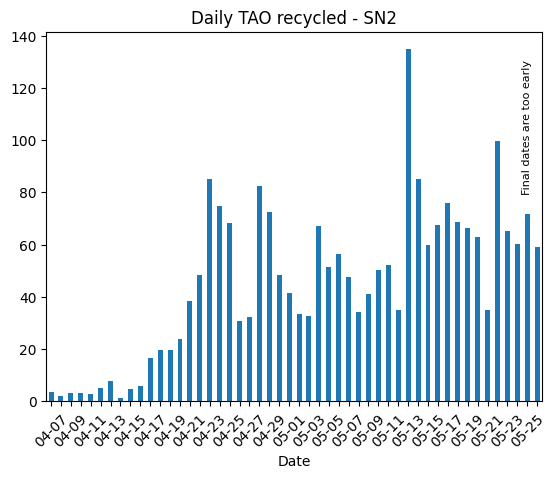

In [26]:
ax = historical_recycle.plot(kind='bar')
plt.xticks(rotation=45)
# Customize x-axis to show every other label
xticks = ax.get_xticks()
xticks_labels = ax.get_xticklabels()

# Set the labels to empty for every other label
for i, label in enumerate(xticks_labels):
    if i % 2 != 0:
        label.set_visible(False)
plt.legend().remove()

# Add a comment using plt.text
plt.text(48, 80, 'Final dates are too early', fontsize=8, color='black', ha='center', rotation=90)

plt.title('Daily TAO recycled - SN2')
plt.show()